In [1]:
#Import all the libraries we use
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import contextily as ctx
import pathlib
import os

In [2]:
import matplotlib.pyplot as plt
import contextily as ctx
# Download the administrative boundary of the 1st district of Budapest
admin_district = ox.geocode_to_gdf('Pankow, Berlin')
admin_poly = admin_district.unary_union

In [3]:
# Download building footprints within the administrative boundary
footprints = ox.features_from_polygon(admin_poly, tags={"building": True})

In [4]:
footprints.head()

opening_hours                   geometry  \
element_type osmid                                                  
node         10539765825           NaN  POINT (13.41350 52.53856)   
             10539796071           NaN  POINT (13.41420 52.53888)   
             11035794361           NaN  POINT (13.42478 52.58930)   
             11247047111           NaN  POINT (13.41623 52.52965)   
             12062495971           NaN  POINT (13.45827 52.52523)   

                                                                    source  \
element_type osmid                                                           
node         10539765825  https://www.kulturbrauerei.de/gelaende/lageplan/   
             10539796071  https://www.kulturbrauerei.de/gelaende/lageplan/   
             11035794361                     estimate; extrapolate; survey   
             11247047111                                               NaN   
             12062495971                                               NaN   

                         entrance amenity maxheight parking brand  \
element_type osmid                                                  
node         10539765825      NaN     NaN       NaN     NaN   NaN   
             10539796071      NaN     NaN       NaN     NaN   NaN   
             11035794361      NaN     NaN       NaN     NaN   NaN   
             11247047111      NaN     NaN       NaN     NaN   NaN   
             12062495971      NaN     NaN       NaN     NaN   NaN   

                         brand:wikidata brand:wikipedia  ...  \
element_type osmid                                       ...   
node         10539765825            NaN             NaN  ...   
             10539796071            NaN             NaN  ...   
             11035794361            NaN             NaN  ...   
             11247047111            NaN             NaN  ...   
             12062495971            NaN             NaN  ...   

                         toilets:menstrual_products roof website:menu  \
element_type osmid                                                      
node         10539765825                        NaN  NaN          NaN   
             10539796071                        NaN  NaN          NaN   
             11035794361                        NaN  NaN          NaN   
             11247047111                        NaN  NaN          NaN   
             12062495971                        NaN  NaN          NaN   

                         source_ref type computer:repair repair ways  \
element_type osmid                                                     
node         10539765825        NaN  NaN             NaN    NaN  NaN   
             10539796071        NaN  NaN             NaN    NaN  NaN   
             11035794361        NaN  NaN             NaN    NaN  NaN   
             11247047111        NaN  NaN             NaN    NaN  NaN   
             12062495971        NaN  NaN             NaN    NaN  NaN   

                         isced:level residential  
element_type osmid                                
node         10539765825         NaN         NaN  
             10539796071         NaN         NaN  
             11035794361         NaN         NaN  
             11247047111         NaN         NaN  
             12062495971         NaN         NaN  

[5 rows x 374 columns]

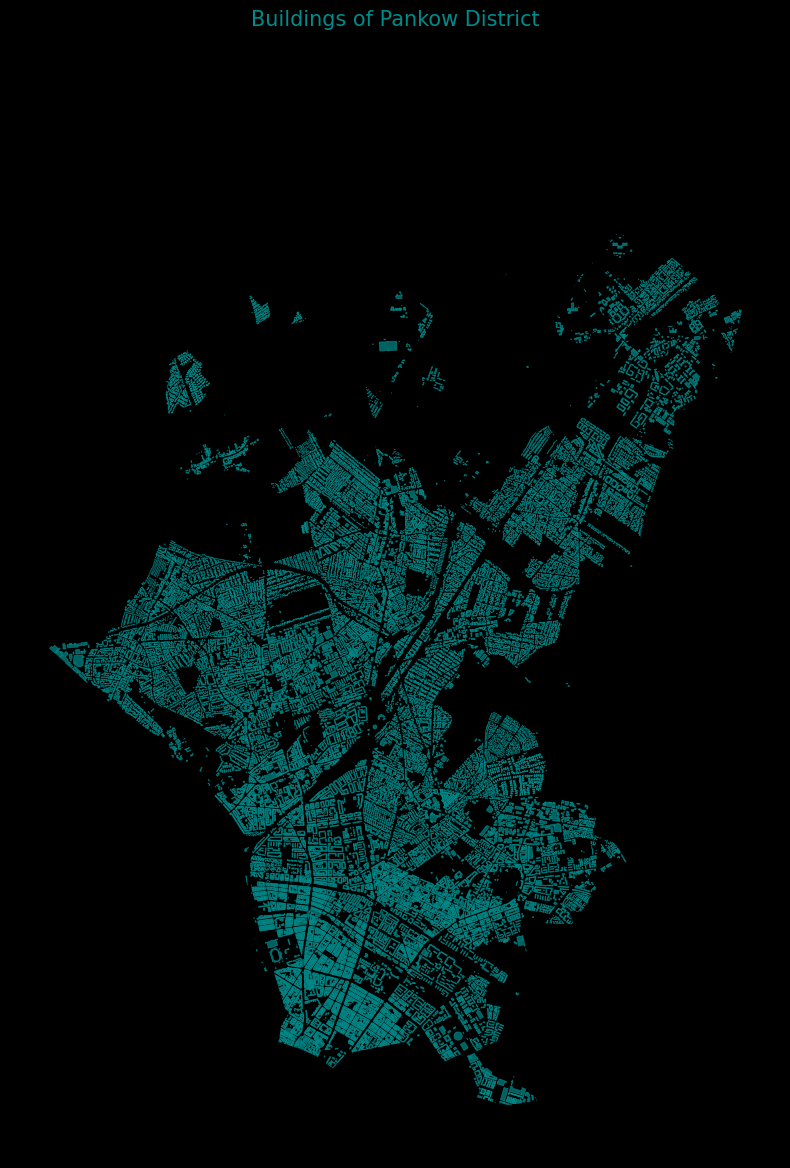

In [9]:
crs = 3857
# Create a plot to visualize the admin boundary and various features
f, ax = plt.subplots(1, 1, figsize=(8, 12))
# Plot the building footprints
footprints.to_crs(crs).plot(ax=ax,
                        color='darkcyan',
                        alpha=0.7,
                        edgecolor='darkcyan',
                        linewidth=0.6,
                        label='Buildings')

admin_district.to_crs(crs).plot(ax=ax,
                                color='none',
                                edgecolor='k',
                                linewidth=2,
                                label='Administrative Boundary')

f.patch.set_facecolor('black')
ax.set_facecolor('black')
plt.title('Buildings of Pankow District', fontsize=15, color='darkcyan')
ax.axis('off')
plt.tight_layout()
# saving the map
# NOTEBOOK_PATH = pathlib.Path().resolve()
# Map = NOTEBOOK_PATH / "../Map" 

# figure_path = os.path.join(Map, "pankow_buildings.png")
# plt.tight_layout()
# plt.savefig(figure_path, dpi=300) #define the size

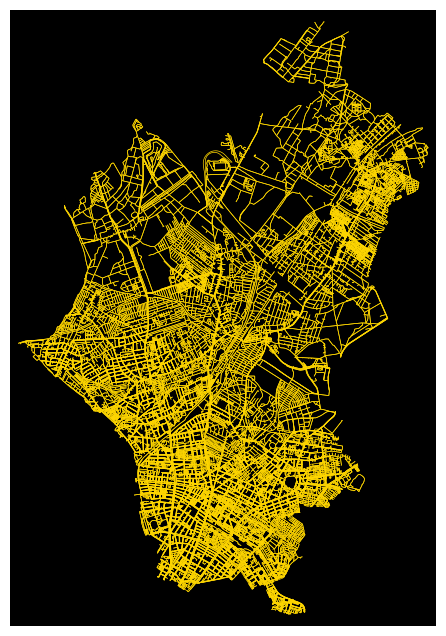

In [36]:
# Plot the street network
fig, ax = ox.plot_graph(G_all, bgcolor='k', node_color='none', node_size=0, edge_color='gold', edge_linewidth=0.5)

plt.show()